### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de la clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?
- ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad? 

In [3]:
lista_alumnos = [["Jalex", 6, 47, 1.80], ["Tomas", 5, 31, 1.80], ["David", 6, 39, 1.81], ["Natalio", 2, 29, 1.73], ["Monica", 3, 47, 1.73], ["Roxanna", 4,24,1.75], ["Filipa", 5,34,1.64], ["Elsa", 4, 36, 1.89], ["Cristina", 3, 46, 1.70], ["Alba", 3, 29, 1.68], ["Valeria",1, 40, 1.60], ["Jose Luis", 4, 47, 1.69], ["Rochi", 2, 38, 1.60], ["Jose Maria", 5, 51, 1.75]]

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
lista_edad = []
for elem in lista_alumnos:
    lista_edad.append(elem[2])

lista_altura = []
for elem in lista_alumnos:
    lista_altura.append(elem[-1])

Dibujamos la linea de regresión lineal:

In [7]:
X= lista_edad
y= lista_altura

In [8]:
X = np.array(lista_edad)
y = np.array(lista_altura)

In [9]:
X = X.reshape(-1, 1)

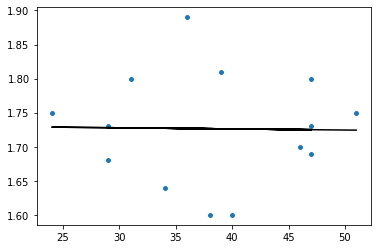

In [53]:

new_model = LinearRegression()
new_model.fit(X,y)
plt.scatter(X,y, edgecolor='White')
plt.plot(X, new_model.predict(X), color='k')
plt.show()

* ¿Es una buena técnica para este tipo de problemas? ¿Por qué?

Considero que no es una buena práctica ya que parece que no hay una relación entre las variables

* ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). 

##### ITERACIÓN 1 #####
x [[47]]
y [1.69]
y_train_predict [1.69]
-----
X_val
 [[36]
 [31]
 [29]
 [38]]
y_val_predict [1.69 1.69 1.69 1.69]
##### ITERACIÓN 2 #####
x [[47]
 [24]]
y [1.69 1.75]
y_train_predict [1.69 1.75]
-----
X_val
 [[36]
 [31]
 [29]
 [38]]
y_val_predict [1.71869565 1.73173913 1.73695652 1.71347826]
##### ITERACIÓN 3 #####
x [[47]
 [24]
 [40]]
y [1.69 1.75 1.6 ]
y_train_predict [1.64223022 1.72910072 1.66866906]
-----
X_val
 [[36]
 [31]
 [29]
 [38]]
y_val_predict [1.68377698 1.70266187 1.71021583 1.67622302]
##### ITERACIÓN 4 #####
x [[47]
 [24]
 [40]
 [47]]
y [1.69 1.75 1.6  1.8 ]
y_train_predict [1.70681303 1.7165864  1.70978754 1.70681303]
-----
X_val
 [[36]
 [31]
 [29]
 [38]]
y_val_predict [1.71148725 1.7136119  1.71446176 1.71063739]
##### ITERACIÓN 5 #####
x [[47]
 [24]
 [40]
 [47]
 [47]]
y [1.69 1.75 1.6  1.8  1.73]
y_train_predict [1.71354774 1.71528141 1.71407538 1.71354774 1.71354774]
-----
X_val
 [[36]
 [31]
 [29]
 [38]]
y_val_predict [1.71437688 1.71475377 

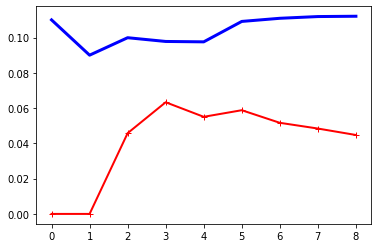

In [27]:
train_errors, val_errors = [], []

def plot_learning_curves(model, X, y, test_size=0.25):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= test_size)
    
    for m in range(1, len(X_train)):  # Incremental
        
        x = X_train[:m]
        y = y_train[:m]
        model.fit(x, y)

        y_train_predict = model.predict(x)
        y_val_predict = model.predict(X_val)

        train_errors.append(mean_absolute_error(y, y_train_predict))
        val_errors.append(mean_absolute_error(y_val, y_val_predict))
       
        print("##### ITERACIÓN " + str(m) + " #####")
        print("x", x)
        print("y", y)
        print("y_train_predict", y_train_predict)
        print("-----\nX_val\n", X_val)
        print("y_val_predict", y_val_predict)



lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.plot(train_errors, "r-+", linewidth=2, label="train")
plt.plot(val_errors, "b-", linewidth=3, label="val")

In [65]:
print("|||||||||||ERRORES||||||||||||")
print("train_errors\n\n", train_errors)
print("val_errors\n\n", val_errors)

|||||||||||ERRORES||||||||||||
train_errors

 [0.0, 2.220446049250313e-16, 0.040000000000000036, 0.06881355932203392, 0.05511752577319577, 0.059189189189189174, 0.06963081861958262, 0.06642857142857145, 0.07001610305958136, 0.08121008403361345, 0.07508766126364538, 0.06923343622779943]
val_errors

 [0.08999999999999986, 0.24555555555555508, 0.24999999999999978, 0.05203389830508476, 0.05213402061855632, 0.07364864864864851, 0.03561797752808982, 0.027142857142856913, 0.025362318840580045, 0.03924369747899181, 0.044900760833609166, 0.04397664742987528]


Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?

In [ ]:
RMSE: (error cuadrático medio de la raíz)

In [ ]:
MSE:
El Error Cuadrático Medio es el criterio de evaluación más usado para problemas de regresión. Se usa sobre todo cuando usamos aprendizaje automático supervisado. 
𝑒𝑟𝑟𝑜𝑟 𝑐𝑢𝑎𝑑𝑟𝑎́𝑡𝑖𝑐𝑜=(𝑟𝑒𝑎𝑙 – 𝑒𝑠𝑡𝑖𝑚𝑎𝑑𝑜)2


In [ ]:
Ejemplo:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mse = mean_squared_error(y_true, y_pred)
mse
# resultado: 0.375

##### ITERACIÓN 1 #####
x [[46]]
y [1.7]
y_train_predict [1.7]
-----
X_val
 [[29]]
y_val_predict [1.7]
##### ITERACIÓN 2 #####
x [[46]
 [29]]
y [1.7  1.68]
y_train_predict [1.7  1.68]
-----
X_val
 [[29]]
y_val_predict [1.68]
##### ITERACIÓN 3 #####
x [[46]
 [29]
 [40]]
y [1.7  1.68 1.6 ]
y_train_predict [1.66103139 1.65874439 1.66022422]
-----
X_val
 [[29]]
y_val_predict [1.65874439]
##### ITERACIÓN 4 #####
x [[46]
 [29]
 [40]
 [51]]
y [1.7  1.68 1.6  1.75]
y_train_predict [1.69713755 1.64184015 1.67762082 1.71340149]
-----
X_val
 [[29]]
y_val_predict [1.64184015]
##### ITERACIÓN 5 #####
x [[46]
 [29]
 [40]
 [51]
 [24]]
y [1.7  1.68 1.6  1.75 1.75]
y_train_predict [1.69491051 1.69722568 1.69572763 1.69422957 1.69790661]
-----
X_val
 [[29]]
y_val_predict [1.69722568]
##### ITERACIÓN 6 #####
x [[46]
 [29]
 [40]
 [51]
 [24]
 [47]]
y [1.7  1.68 1.6  1.75 1.75 1.73]
y_train_predict [1.70373459 1.69832617 1.70182574 1.70532531 1.69673545 1.70405274]
-----
X_val
 [[29]]
y_val_predict [1.69832

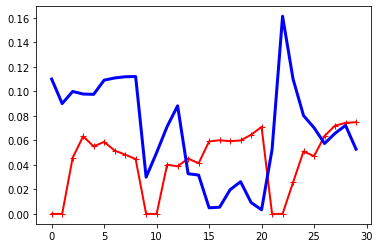

In [29]:
# llamo a la función cambiando test_size
plot_learning_curves(model, X, y, test_size=0.05)
model = LinearRegression()
# Dibujamos los datos
plot_learning_curves(lin_reg, X, y)
plt.plot(train_errors, "r-+", linewidth=2, label="train")
plt.plot(val_errors, "b-", linewidth=3, label="val")

* Representa la matriz de correlación, ¿los datos están correlacionados?


In [26]:
lista_alumnos2 = pd.DataFrame(
       {'Edad': lista_edad,
        'Altura': lista_altura
       })
lista_alumnos2

,Edad,Altura
0,47,1.80
1,31,1.80
2,39,1.81
3,29,1.73
4,47,1.73
5,24,1.75
6,34,1.64
7,36,1.89
8,46,1.70
9,29,1.68


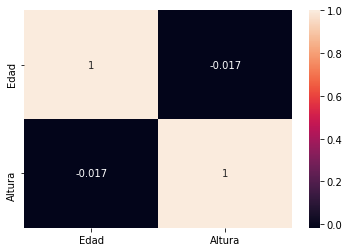

In [27]:
sns.heatmap(lista_alumnos2.corr(), annot = True)

In [ ]:
Como podemos observar en la matriz de correlación no coinciden los datos en absoluto.

* ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad?

In [30]:
lista_edad2 = []
for elem in lista_edad:
    p = elem*2
    lista_edad2.append(p)
lista_edad2

[94, 62, 78, 58, 94, 48, 68, 72, 92, 58, 80, 94, 76, 102]

In [31]:
lista_altura2 = []
for elem in lista_altura:
    p = elem*2
    lista_altura2.append(p)
lista_altura2

[3.6, 3.6, 3.62, 3.46, 3.46, 3.5, 3.28, 3.78, 3.4, 3.36, 3.2, 3.38, 3.2, 3.5]

Si multiplicamos *2 la edad:

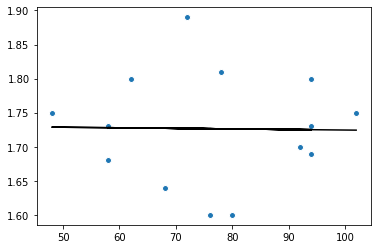

In [32]:
X2 = np.array(lista_edad2)
y = np.array(lista_altura)
X2 = X2.reshape(-1, 1)
new_model = LinearRegression()
new_model.fit(X2,y)
plt.scatter(X2,y, edgecolor='White')
plt.plot(X2, new_model.predict(X2), color='k')
plt.show()

Si multiplicamos *2 la altura

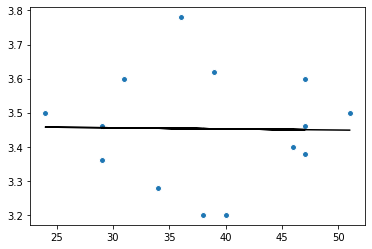

In [33]:
X = np.array(lista_edad)
y2 = np.array(lista_altura2)
X = X.reshape(-1, 1)
new_model = LinearRegression()
new_model.fit(X,y2)
plt.scatter(X,y2, edgecolor='White')
plt.plot(X, new_model.predict(X), color='k')
plt.show()

No observamos cambios en los datos ya que no tiene ni conexión entre ello ni correlación.